In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Advertising.csv")

In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
x = df.drop('sales',axis=1)
y = df['sales']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
test_predictions =model.predict(x_test)


In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
mean_absolute_error(y_test,test_predictions)

1.236918849425931

In [66]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5324409426512415

In [67]:
test_residuals = y_test - test_predictions

In [68]:
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

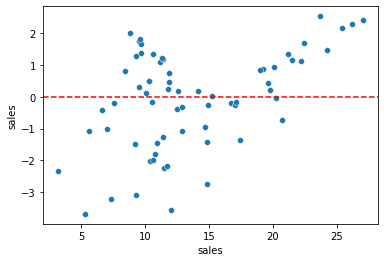

In [71]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color="r",ls="dashed")

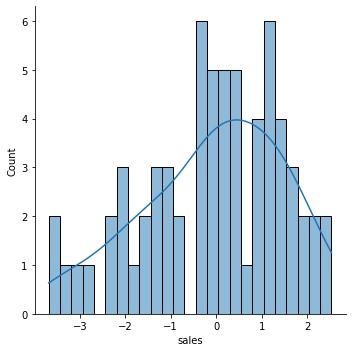

In [72]:
sns.displot(test_residuals,bins=25,kde=True)

In [82]:
import scipy as sp

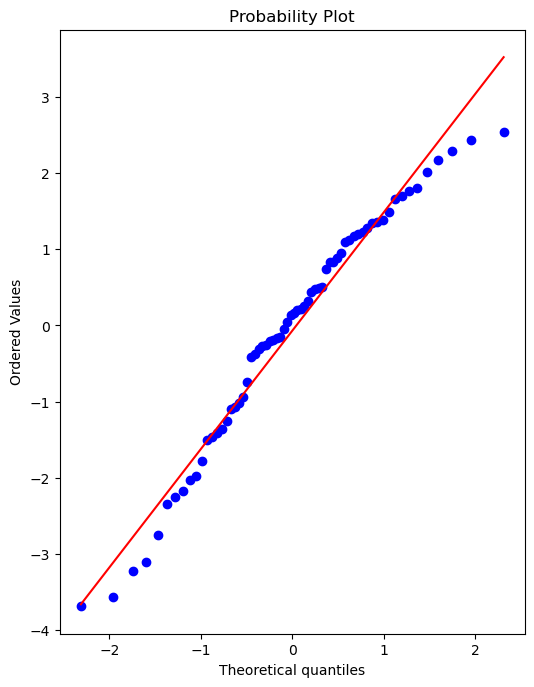

In [84]:

fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [85]:
final_model = LinearRegression()

In [86]:
final_model.fit(x,y)

LinearRegression()

In [87]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [88]:
y_hat = final_model.predict(x)

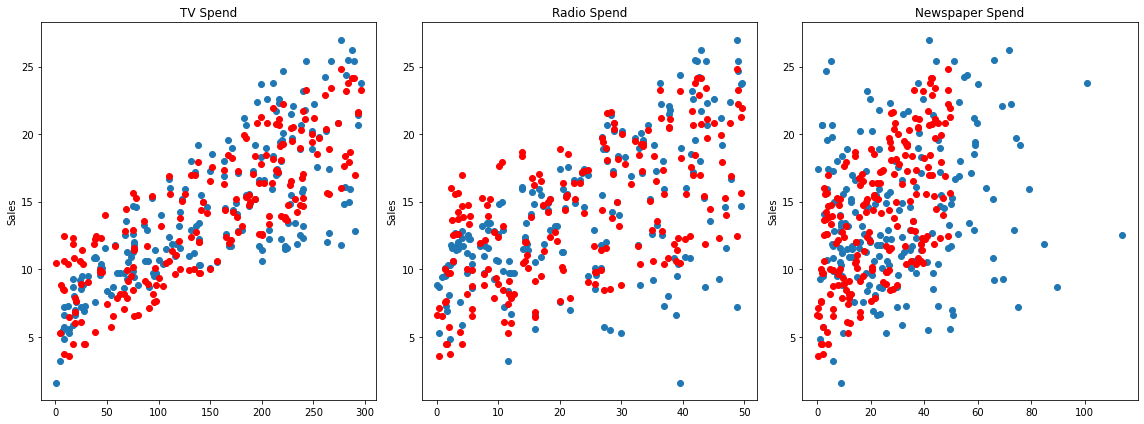

In [89]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [91]:
x.shape

(200, 3)

In [92]:
campaign = [[149,22,12]]

In [94]:
from joblib import dump, load

In [95]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [96]:
loaded_model = load('sales_model.joblib')

In [97]:
loaded_model.predict(campaign)

array([13.893032])